# Credit EDA - Case study

### Importing libraries 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Application Data

In [2]:
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Analysis for Application Data

### Finding the percentage of missing values in all columns

In [5]:
round(df.isnull().sum()/df.shape[0]*100,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [6]:
# remove columns with high missing percentage
# considering 50% as the threshold value
df= df.loc[:, 100*df.isnull().sum()/len(df) < 50]
# checking for shape of the data
df.shape

(307511, 81)

In [7]:
round(df.isnull().sum()/df.shape[0]*100,2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 81, dtype: float64

In [8]:
list(df.columns[(df.isnull().mean()<=0.13) & (df.isnull().mean()>0)])


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

### Checking for values to impute in columns

###  EXT_SOURCE_2 imputation

In [9]:
df['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

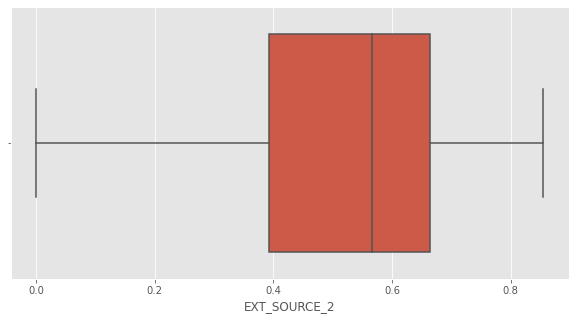

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(df['EXT_SOURCE_2'])
plt.show()

In [11]:
# Since EXT_SOURCE_2 has no outlier, we can choose mean to impute the column
imputVAL = round(df['EXT_SOURCE_2'].mean(),2)
print(f'Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. {imputVAL}')

Since EXT_SOURCE_2 has no outlier, the column can be imputed using the mean of the coumn i.e. 0.51


### OCCUPATION_TYPE imputation

In [12]:
df['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

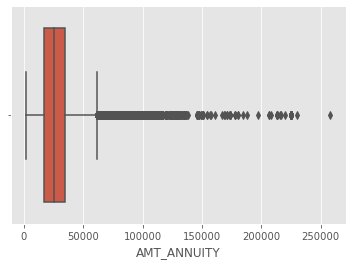

In [13]:
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

In [14]:
imputVAL = round(df['AMT_ANNUITY'].median(),2)
print(f'Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since AMT_ANNUITY has outliers, the column can be imputed using the median of the coumn i.e. 24903.0


### NAME_TYPE_SUITE imputation

In [15]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [16]:
imputVAL = df['NAME_TYPE_SUITE'].mode()
print(f'Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e {imputVAL[0]}') 

Clearly the column NAME_TYPE_SUITE is a categorical column. So this column can be imputed using the mode of the column i.e Unaccompanied


### CNT_FAM_MEMBERS imputation

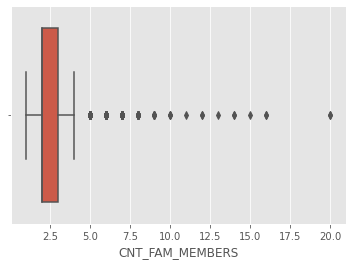

In [17]:
# Since this is count of family members, this is a continuous variable and we can impute the mean/median
sns.boxplot(df['CNT_FAM_MEMBERS'])
plt.show()

In [18]:
imputVAL = round(df['CNT_FAM_MEMBERS'].median(),2)
print(f'Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the coumn i.e. 2.0


###  AMT_GOODS_PRICE imputation

In [19]:
df['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

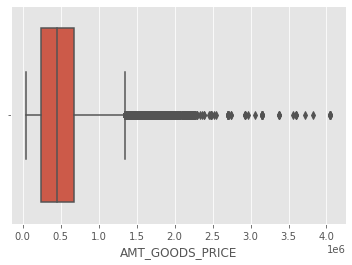

In [20]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

In [21]:
# Since this is a continuous variable with outliers we can impute column using median value
imputVAL = round(df['AMT_GOODS_PRICE'].median(),2)
print(f'Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. {imputVAL}')

Since AMT_GOODS_PRICE has outliers, the column can be imputed using the median of the coumn i.e. 450000.0


### Checking and modifying datatypes of columns 

In [22]:
#Checking the float type columns
df.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [23]:
#Converting these count columns to int64
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df.loc[:,ColumnToConvert]=df.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [24]:
#Checking the object type columns
ColumnToConvert = list(df.select_dtypes(include='object').columns)

In [25]:
df.loc[:,ColumnToConvert]=df.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))

In [26]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#Making Gender more readable
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [28]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
df = df[df['CODE_GENDER']!='XNA']
df['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

### Binning variables for analysis

In [29]:
df['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
#Creating A new categorical variable based on income total
df['INCOME_GROUP']=pd.qcut(df['AMT_INCOME_TOTAL'],
                                       q=[0,0.1,0.3,0.6,0.8,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [31]:
#Binning DAYS_BIRTH
abs(df['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [32]:
#Creating a column AGE using DAYS_BIRTH
df['AGE']=abs(df['DAYS_BIRTH'])//365.25

In [33]:
df['AGE'].describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [34]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
df['AGE_GROUP'] = pd.cut(df['AGE'],bins=np.arange(20,71,5))

In [35]:
## Adding one more column that will be used for analysis later
df['CREDIT_INCOME_RATIO']=round((df['AMT_CREDIT']/df['AMT_INCOME_TOTAL']))

In [36]:
### Getting the percentage of social circle who defaulted
df['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=df['DEF_30_CNT_SOCIAL_CIRCLE']/df['OBS_30_CNT_SOCIAL_CIRCLE']
df['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=df['DEF_60_CNT_SOCIAL_CIRCLE']/df['OBS_60_CNT_SOCIAL_CIRCLE']

### Checking for imbalance in Target

In [37]:
df['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

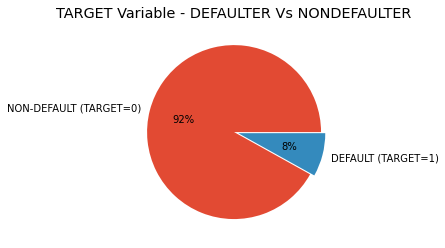

In [38]:
plt.pie(df['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

In [39]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement 
#for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [40]:
df_final=df[FinalColumns]

In [41]:
df_final.shape

(307507, 30)

### Splitting the dataframe into two separate dfs

In [42]:
NEWAPP0=df_final[df_final.TARGET==0]    # Dataframe with all the data related to non-defaulters
NEWAPP1=df_final[df_final.TARGET==1]    # Dataframe with all the data related to defaulters

### Univariate Categorical Ordered Analysis

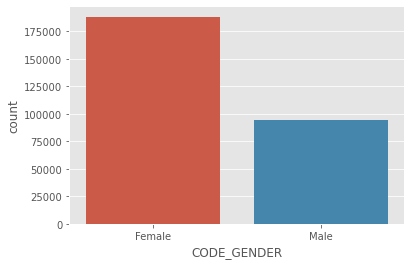

In [43]:
sns.countplot(data=NEWAPP0, x="CODE_GENDER")
plt.show()

Client with clean record – We can see the majority of females tend to maintain a clean record

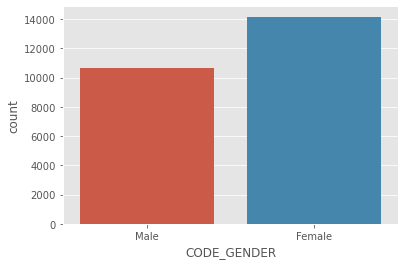

In [44]:
sns.countplot(data=NEWAPP1, x="CODE_GENDER")
plt.show()

Client with Payment difficulties – We see
females tend to be majority.

We can conclude the more females tend to take loan more andalso comparatively maintain a clean record compared to male.

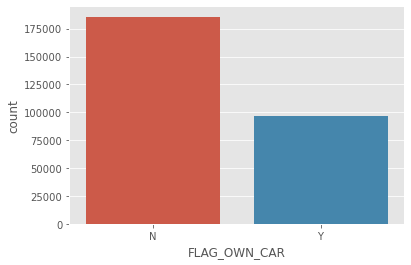

In [45]:
sns.countplot(data=NEWAPP0, x='FLAG_OWN_CAR')
plt.show()

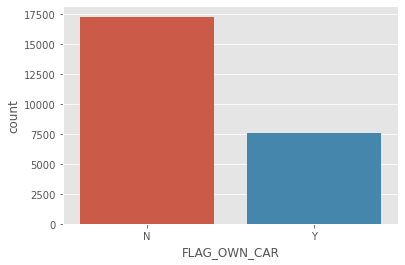

In [46]:
sns.countplot(data=NEWAPP1, x='FLAG_OWN_CAR')
plt.show()

While people who have car default more often, the reason could be there are simply more people
without cars Looking at the percentages in both the charts, we can conclude that the rate of default of
people having car is low compared to people who don't.

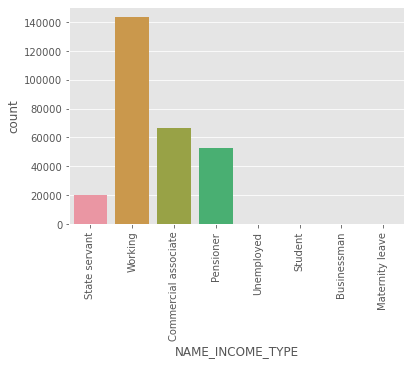

In [47]:
sns.countplot(data=NEWAPP0, x='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.show()

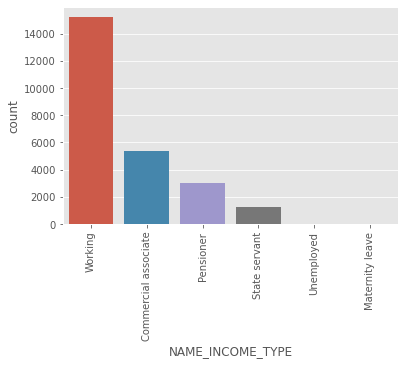

In [48]:
sns.countplot(data=NEWAPP1, x='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.show()

We can notice that the students don't default. The reason could be they are not required to pay during the time
they are students. We can also see that the Businessmen never default. Most of the loans are distributed to
working class people. We also see that in working class people, the chances of defaulting are more.

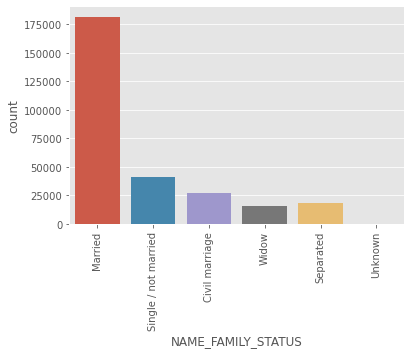

In [49]:
sns.countplot(data=NEWAPP0, x='NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
plt.show()

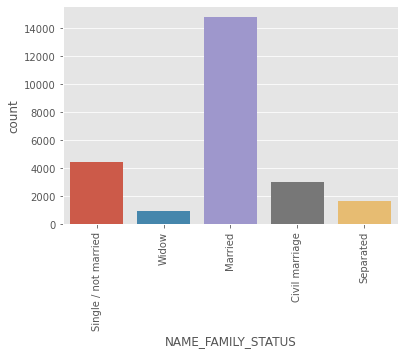

In [50]:
sns.countplot(data=NEWAPP1, x='NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
plt.show()

Married people tend to apply for more loans comparatively.
But from the graph we see that Single/non Married people, more risk is associated with them.

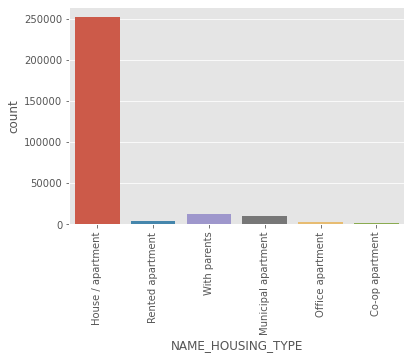

In [51]:
sns.countplot(data=NEWAPP0, x='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.show()

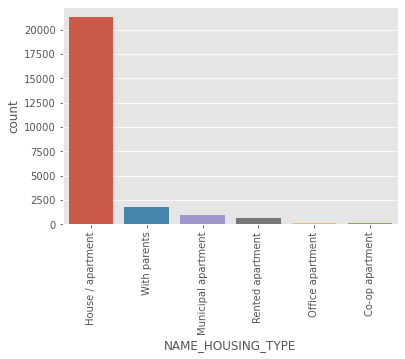

In [52]:
sns.countplot(data=NEWAPP1, x='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.show()

It is clear from the graph that people who have House/Apartment, tend to apply for more loans. People living with
parents tend to default more often when compared with others. The reason could be their living expenses are more
due to their parents living with them.

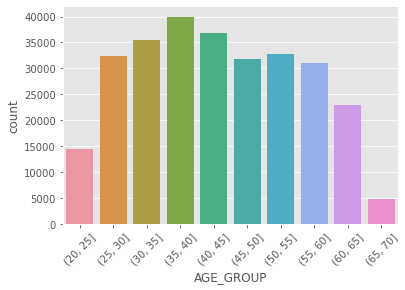

In [53]:
sns.countplot(data=NEWAPP0, x='AGE_GROUP')
plt.xticks(rotation=45)
plt.show()

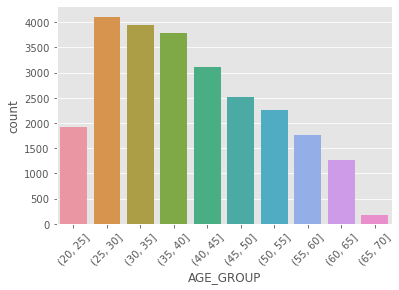

In [54]:
sns.countplot(data=NEWAPP1, x='AGE_GROUP')
plt.xticks(rotation=45)
plt.show()

We see that (25,30] age group tend to default more often. So they are the riskiest people to loan
to.
With increasing age group, people tend to default less starting from the age 25. One of the
reasons could be they get employed around that age and with increasing age, their salary also
increases.

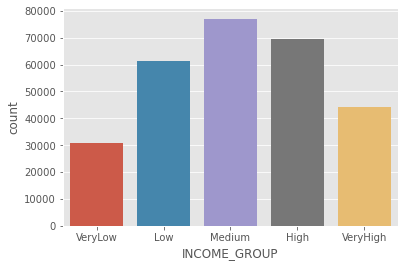

In [55]:
sns.countplot(data=NEWAPP0, x='INCOME_GROUP')
plt.show()

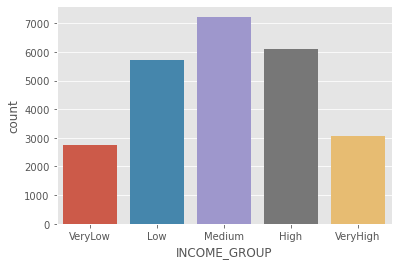

In [56]:
sns.countplot(data=NEWAPP1, x='INCOME_GROUP')
plt.show()

The Very High income group tend to default less often.

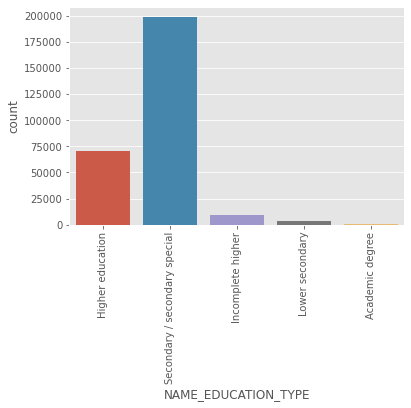

In [57]:
sns.countplot(data=NEWAPP0, x='NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.show()

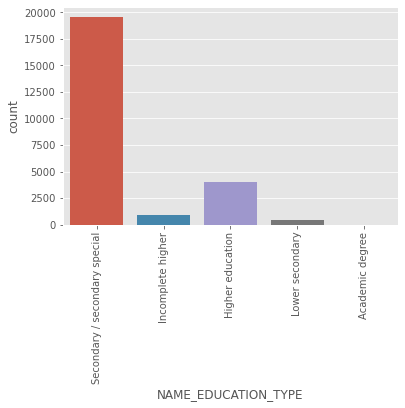

In [58]:
sns.countplot(data=NEWAPP1, x='NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.show()

Almost all of the Education categories are equally likely to default except for the higher
educated ones who are less likely to default and secondary educated people are more likely to
default

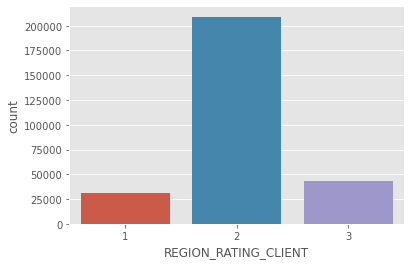

In [59]:
sns.countplot(data=NEWAPP0, x='REGION_RATING_CLIENT')
plt.show()

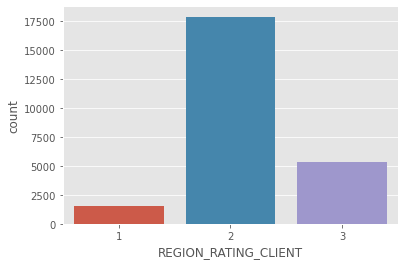

In [60]:
sns.countplot(data=NEWAPP1, x='REGION_RATING_CLIENT')
plt.show()

Almost all of the Education categories are equally likely to default except for the higher
educated ones who are less likely to default and secondary educated people are more likely to
default

### Univariate continuous variable analysis

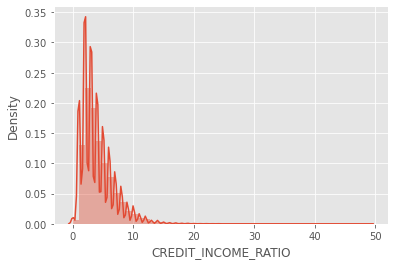

In [61]:
sns.distplot(a=NEWAPP0['CREDIT_INCOME_RATIO'])
plt.show()

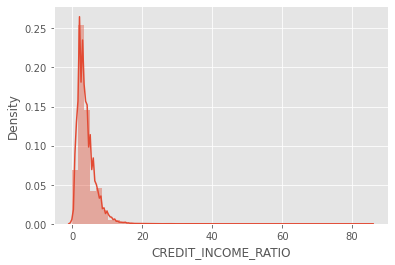

In [62]:
sns.distplot(a=NEWAPP1['CREDIT_INCOME_RATIO'])
plt.show()

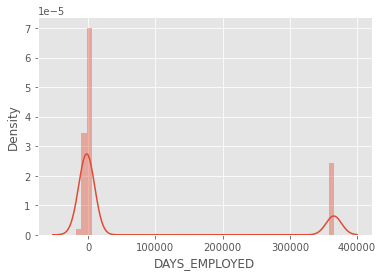

In [63]:
sns.distplot(a=NEWAPP0['DAYS_EMPLOYED'])
plt.show()

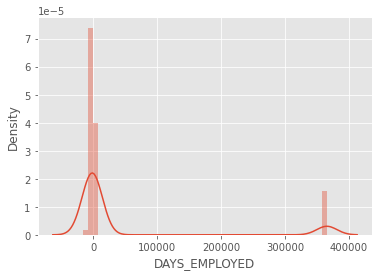

In [64]:
sns.distplot(a=NEWAPP1['DAYS_EMPLOYED'])
plt.show()

In [65]:
NEWAPP1['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
10.0        1
13.0        1
11.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

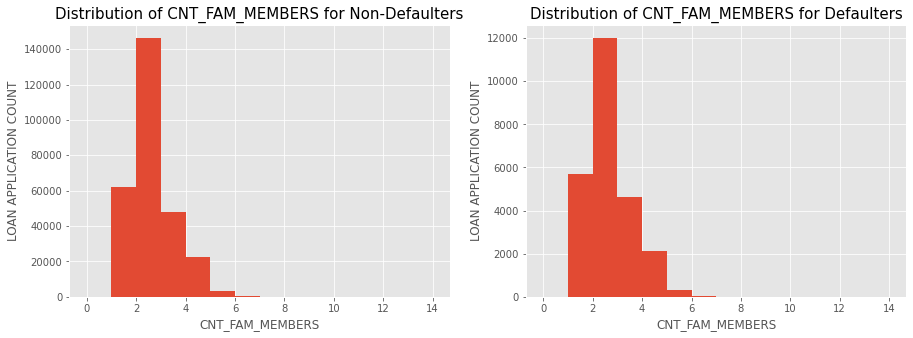

In [66]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
NEWAPP0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
NEWAPP1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

We can see that a family of 3 applies loan more often than the other families

### Getting the top 10 correlation of the selected columns

In [67]:
#Getting the top 10 correlation in NEWAPP0
corr=NEWAPP0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950148,0.950148
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.873003,0.873003
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
272,AMT_ANNUITY,AMT_CREDIT,0.771308,0.771308
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589,0.648589
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.628749,0.628749
273,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954,0.418954
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.391499,0.391499
309,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349461,0.349461


In [68]:
#Getting the top 10 correlation NEWAPP1
corr=NEWAPP1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956637,0.956637
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.874562,0.874562
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
272,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744,0.639744
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.623163,0.623163
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.381298,0.381298
113,DAYS_REGISTRATION,DAYS_EMPLOYED,-0.188929,0.188929
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.186561,0.186561


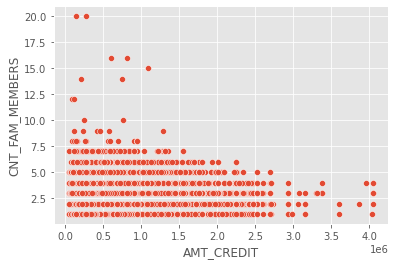

In [69]:
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=NEWAPP0)
plt.show()

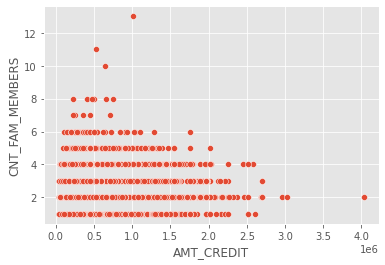

In [70]:
sns.scatterplot(x='AMT_CREDIT', y='CNT_FAM_MEMBERS',data=NEWAPP1)
plt.show()

We can see that the density in the lower left corner is similar in both the case, so the people are equally
likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families
and people with larger AMT_CREDIT default less often

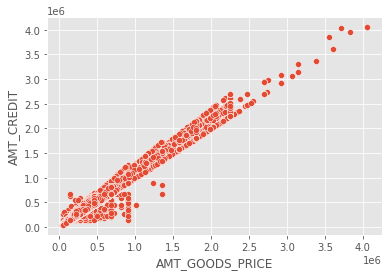

In [71]:
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT',data=NEWAPP0)
plt.show()

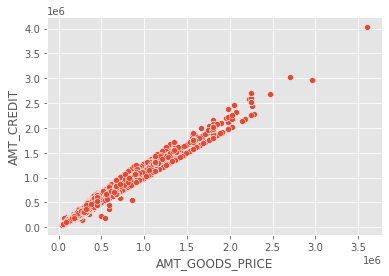

In [72]:
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT',data=NEWAPP1)
plt.show()

### PreviousApplication data 

In [73]:
old_df = pd.read_csv("/Users/lavanyagowda/Downloads/previous_application.csv")

In [74]:
old_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
old_df.shape

(1670214, 37)

In [76]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [77]:
old_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [78]:
# Removing all the columns with more than 50% of null values
old_df = old_df.loc[:,old_df.isnull().mean()<=0.5]
old_df.shape

(1670214, 33)

###  Univariate analysis

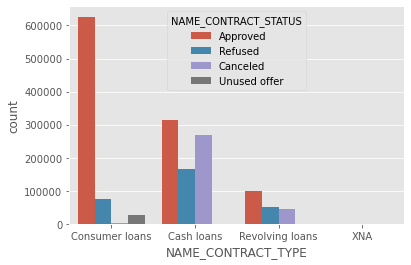

In [79]:
sns.countplot(x='NAME_CONTRACT_TYPE', data=old_df,hue='NAME_CONTRACT_STATUS')
plt.show()

From the above chart, we can infer that,
most of the applications are for 'Cash loan'
and 'Consumer loan'. Although the cash
loans are refused more often than others.

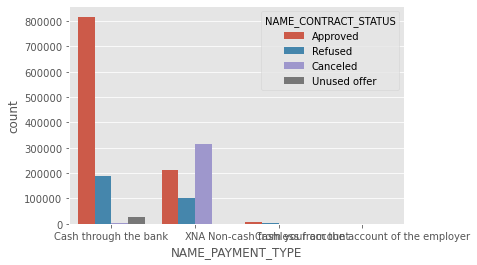

In [80]:
sns.countplot(x='NAME_PAYMENT_TYPE', data=old_df,hue='NAME_CONTRACT_STATUS')
plt.show()

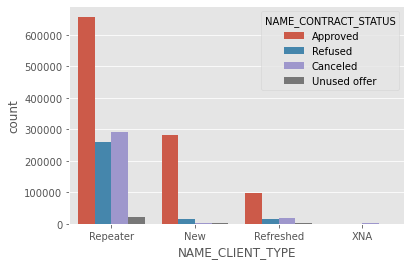

In [81]:
sns.countplot(x='NAME_CLIENT_TYPE', data=old_df,hue='NAME_CONTRACT_STATUS')
plt.show()

Most of the loan applications are from
repeat customers, out of the total
applications 70% of customers are
repeaters. They also get refused most
often.

### Checking the correlation in the PreviousApplication dataset

In [82]:
#Getting the top 10 correlation PreviousApplication
corr=old_df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


### Using pairplot to perform bivariate analysis on numerical columns

<Figure size 1440x576 with 0 Axes>

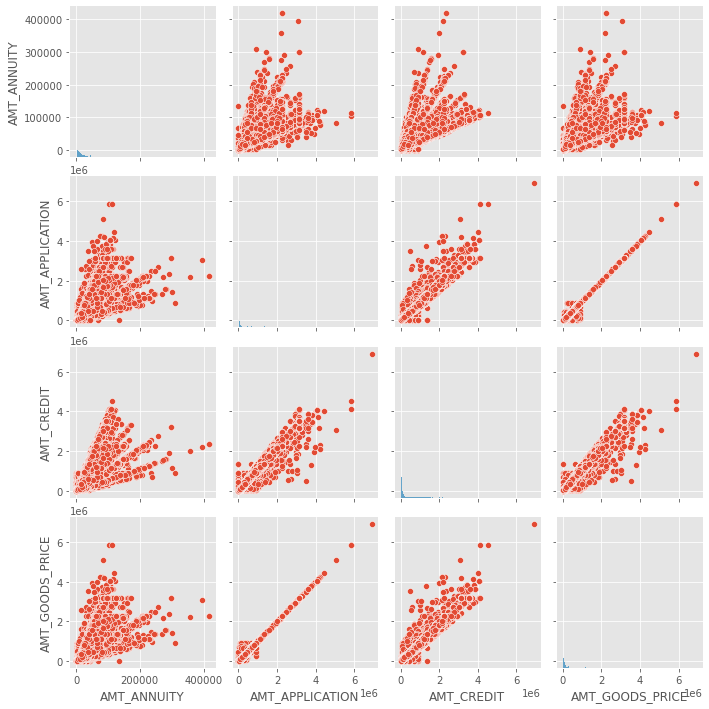

In [83]:
# #plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
data_plot = old_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']]
sns.pairplot(data_plot)
plt.show()

1.Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors)

(1) How much credit did client asked on the previous application

(2)Final credit amount on the previous application that was approved by the bank

(3) Goods price of good that client asked for on the previous application.

2.For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked
for on the previous application

3.Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the
goods price of good that client asked for on the previous application.